Accuracy: 0.7272727272727273


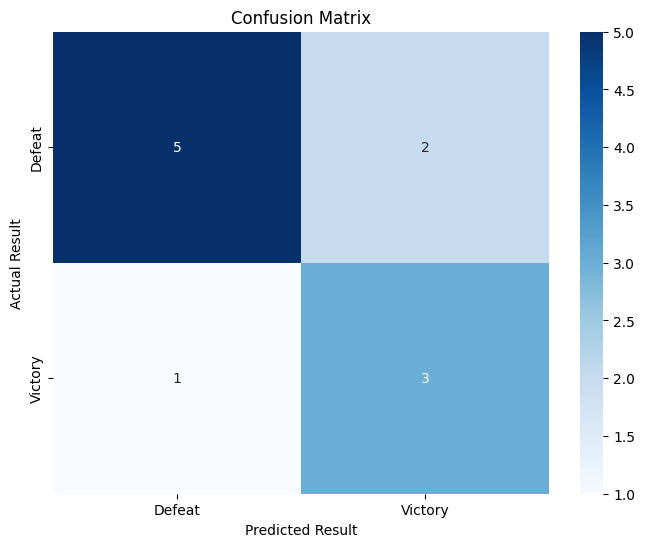

Prediction: Defeat
   Actual Result Predicted Result
19        Defeat           Defeat
41       Victory          Victory
47        Defeat           Defeat
12       Victory           Defeat
43       Victory          Victory
5         Defeat          Victory
17        Defeat           Defeat
50        Defeat           Defeat
3        Victory          Victory
32        Defeat           Defeat
13        Defeat          Victory


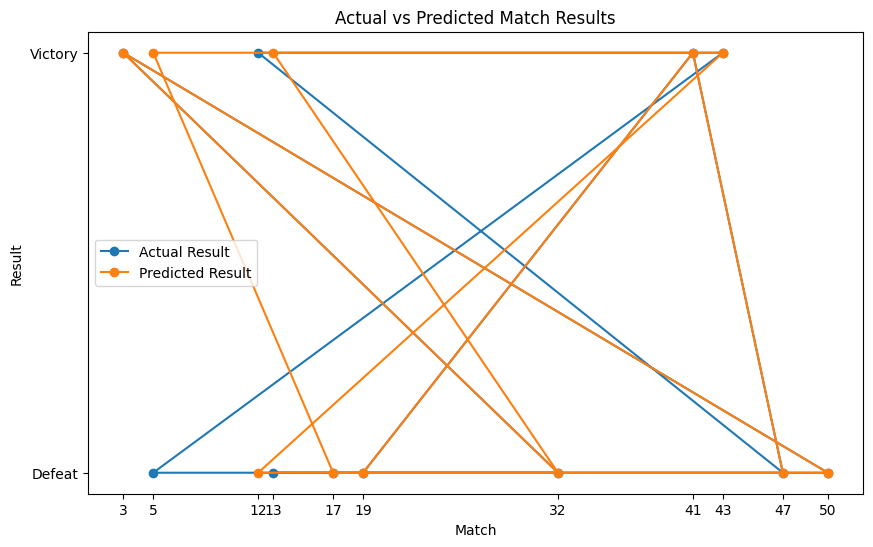

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create an expanded dataset with 50 matches
data = pd.DataFrame({
    'Opponent': ['India', 'Bhutan', 'Sri Lanka', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Bhutan', 'India', 'Bangladesh', 'Sri Lanka',
                 'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka', 'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka',
                 'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka', 'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka',
                 'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka', 'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka',
                 'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka', 'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka',
                 'India', 'Bhutan'],
    'Location': ['Away', 'Home', 'Away', 'Away', 'Home', 'Away', 'Home', 'Home', 'Away', 'Home',
                 'Away', 'Home', 'Away', 'Away', 'Home', 'Home', 'Home', 'Away', 'Away', 'Home',
                 'Away', 'Home', 'Away', 'Away', 'Home', 'Home', 'Home', 'Away', 'Away', 'Home',
                 'Away', 'Home', 'Away', 'Away', 'Home', 'Home', 'Home', 'Away', 'Away', 'Home',
                 'Away', 'Home', 'Away', 'Away', 'Home', 'Home', 'Home', 'Away', 'Away', 'Home',
                 'Away', 'Home'],
    'Toss Winner': ['India', 'Nepal', 'Sri Lanka', 'Bhutan', 'Nepal', 'Afghanistan', 'Bhutan', 'India', 'Bangladesh', 'Nepal',
                    'Bhutan', 'India', 'Bangladesh', 'Afghanistan', 'Sri Lanka', 'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka',
                    'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka', 'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka',
                    'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka', 'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka',
                    'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka', 'India', 'Bhutan', 'Bangladesh', 'Afghanistan', 'Sri Lanka',
                    'India', 'Bhutan'],
    'Result': ['Defeat', 'Victory', 'Defeat', 'Victory', 'Defeat', 'Defeat', 'Victory', 'Defeat', 'Defeat', 'Defeat',
               'Defeat', 'Victory', 'Victory', 'Defeat', 'Victory', 'Defeat', 'Victory', 'Defeat', 'Victory', 'Defeat',
               'Defeat', 'Victory', 'Defeat', 'Victory', 'Defeat', 'Defeat', 'Victory', 'Defeat', 'Defeat', 'Victory',
               'Defeat', 'Victory', 'Defeat', 'Victory', 'Defeat', 'Defeat', 'Victory', 'Defeat', 'Victory', 'Defeat',
               'Defeat', 'Victory', 'Defeat', 'Victory', 'Defeat', 'Defeat', 'Victory', 'Defeat', 'Victory', 'Defeat',
               'Defeat', 'Victory']
})

# Convert categorical data to numerical data using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Opponent', 'Location', 'Toss Winner'])

# Split the dataset into training and testing sets
X = data_encoded.drop('Result', axis=1)
y = data_encoded['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the testing set and evaluate the model's performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Defeat', 'Victory']

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Result')
plt.ylabel('Actual Result')
plt.title('Confusion Matrix')
plt.show()

# Make predictions on the actual match result
new_data = pd.DataFrame({
    'Opponent': ['Bangladesh'],
    'Location': ['Home'],
    'Toss Winner': ['Bangladesh']
})
new_data_encoded = pd.get_dummies(new_data, columns=['Opponent', 'Location', 'Toss Winner'])
new_X = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)
prediction = clf.predict(new_X)
print('Prediction:', prediction[0])

# Create a table to display the actual and predicted match results
actual_vs_predicted = pd.DataFrame({'Actual Result': y_test, 'Predicted Result': y_pred})
print(actual_vs_predicted)

# Visualize the actual and predicted match results
plt.figure(figsize=(10, 6))
plt.plot(actual_vs_predicted.index, actual_vs_predicted['Actual Result'], marker='o', label='Actual Result')
plt.plot(actual_vs_predicted.index, actual_vs_predicted['Predicted Result'], marker='o', label='Predicted Result')
plt.xticks(actual_vs_predicted.index)
plt.xlabel('Match')
plt.ylabel('Result')
plt.title('Actual vs Predicted Match Results')
plt.legend()
plt.show()
